In [21]:
import pandas as pd
train_file = 'blp25_hatespeech_subtask_1A_train.tsv'
validation_file = 'blp25_hatespeech_subtask_1A_dev.tsv'
test_file = 'blp25_hatespeech_subtask_1A_test.tsv'


validation_file2 = 'blp25_hatespeech_subtask_1A_dev_test_with_labels.tsv'

test_file = 'blp25_hatespeech_subtask_1A_test_with_labels.tsv'

#tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")
# Load train/val/test DataFrames
#tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")
# Load train/val/test DataFrames
train_df = pd.read_csv(train_file, sep="\t")
dev_df1 = pd.read_csv(validation_file , sep="\t")
dev_df2 = pd.read_csv(validation_file2 , sep="\t")
test_df = pd.read_csv(test_file, sep="\t")



# Concatenate them into one dataframe
train_df = pd.concat([train_df, dev_df1, dev_df2], ignore_index=True)
dev_df =test_df


In [23]:
# #tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")
# # Load train/val/test DataFrames
# train_df = pd.read_csv(train_file, sep="\t")
# dev_df = pd.read_csv(validation_file , sep="\t")
# test_df = pd.read_csv(test_file, sep="\t")





In [24]:
l2id = {'None': 0, 'Society': 1, 'Organization': 2, 'Community': 3, 'Individual': 4}
id2l = {v: k for k, v in l2id.items()}


def clean_label(x):
    # handle missing or NaN → "None"
    if pd.isna(x) or x == 'None':
        return 'None'
    # already list-like e.g. ['Abusive']
    if isinstance(x, list):
        return x[0] if len(x) > 0 else 'None'
    # string cases like "[]" or "[Abusive]" or "[Political Hate]"
    x = x.strip("[]").strip()
    if x == "":
        return 'None'
    return x


def process_df(df):
    # Ensure labels are proper lists
    df["label"] = df["label"].apply(clean_label)
    df["label"] = df["label"].fillna("None")
    # Now create binary label
    df["toxic"] = df["label"].apply(lambda x: 0 if x == "None" else 1)
    df["label_id"] = df["label"].map(l2id)

    

  

    return df

train_df = process_df(train_df)
dev_df  = process_df(dev_df)
test_df=process_df(test_df)
train_df

,id,text,label,toxic,label_id
0,147963,ধন্যবাদ বর্ডার গার্ড দেরকে এভাবে পাহারা দিতে হ...,None,0,0.0
1,214275,ছোটবেলায় অনেক কষ্ট করে কিছু গালাগালি শিখছিলাম...,None,0,0.0
2,849172,অতিরিক্ত এ নিজেকে বাদুর বানাইয়া ফেলছেন রে,Abusive,1,NaN
3,821985,চিন ভারত রাশিয়া এই তিন দেশ এক থাকলে বিশ্বকে শা...,None,0,0.0
4,477288,এটার বিচার কে করবেযে বিচার করবে সেই তো হলো এই ...,Abusive,1,NaN
...,...,...,...,...,...
40541,776466,সত্য কথা তেতু লাগে,None,0,0.0
40542,849227,এই ফকিননি মাগীটা আর কত নাটক দেখাবে,Abusive,1,NaN
40543,532697,দেখো আজকে কার ফিটনেস কোথায় দাঁড়িয়েছে তুমি চ...,Profane,1,NaN
40544,861411,ছোট ভাইটির পাসে থাকুন গেম ভিড়িও বানাই,None,0,0.0


In [25]:
train_df["toxic"] = train_df["toxic"].replace({0: "None", 1: "Toxic"})
dev_df["toxic"] = dev_df["toxic"].replace({0: "None", 1: "Toxic"})
test_df["toxic"] = test_df["toxic"].replace({0: "None", 1: "Toxic"})


In [5]:

# Display the result
print(train_df[['text', 'toxic']].head())

                                                text  toxic
0  ধন্যবাদ বর্ডার গার্ড দেরকে এভাবে পাহারা দিতে হ...   None
1  ছোটবেলায় অনেক কষ্ট করে কিছু গালাগালি শিখছিলাম...   None
2          অতিরিক্ত এ নিজেকে বাদুর বানাইয়া ফেলছেন রে  Toxic
3  চিন ভারত রাশিয়া এই তিন দেশ এক থাকলে বিশ্বকে শা...   None
4  এটার বিচার কে করবেযে বিচার করবে সেই তো হলো এই ...  Toxic


In [6]:
df_train = train_df

df_val = dev_df

df_val

,id,text,label,toxic,label_id
0,12764,ইজরায়েলের বিচার হওয়া উচিৎ,Abusive,Toxic,NaN
1,202933,শামীম ওসামা বিন হাসিনা,None,None,0.0
2,165894,হেন কাপ পুলিশের মারে অন্যরা তাহলে পলিশের কি হব...,None,None,0.0
3,124999,আল্লাহ্ এসব জানোয়ারদের শেষ করে দাও,Profane,Toxic,NaN
4,535301,ইহুদির বাচ্চা ইহুদী ই হবে,Religious Hate,Toxic,NaN
...,...,...,...,...,...
10195,908819,শালা জঙ্গি নিচু জাত বাংলাদেশের শালা নিজের দেশ ...,Profane,Toxic,NaN
10196,597085,এরে হেতি হাগল অই গেছে হেতিরে পাবনা নে,Abusive,Toxic,NaN
10197,901448,এখান থেকে প্রমান হলো বাংলার মীর জাফর চাইলেই তা...,None,None,0.0
10198,617821,শুনি যে এই দেশের সংবিধান গণতান্ত্রিক সংবিধান ক...,None,None,0.0


In [7]:
# import pandas as pd

# # existing train and dev
# df_train = train_df.copy()
# df_val   = dev_df.copy()

# # split dev_df in half
# half = len(df_val) // 2
# dev_train = df_val.iloc[:half].reset_index(drop=True)
# dev_val   = df_val.iloc[half:].reset_index(drop=True)

# # add first half of dev to training set
# df_train = pd.concat([df_train, dev_train], ignore_index=True)

# # final validation set is the second half
# df_val = dev_val

# print("Train size:", len(df_train))
# print("Validation size:", len(df_val))



import pandas as pd

# existing train and dev
df_train = train_df.copy()
df_val   = dev_df.copy()

# --- 75/25 split of dev_df ---
n   = len(df_val)
cut = int(0.75 * n)  # floor to an integer

# (optional) shuffle to avoid order bias:
# df_val = df_val.sample(frac=1, random_state=42).reset_index(drop=True)

dev_train = df_val.iloc[:cut].reset_index(drop=True)  # 75%
dev_val   = df_val.iloc[cut:].reset_index(drop=True)  # 25%

# add 75% of dev to training set
df_train = pd.concat([df_train, dev_train], ignore_index=True)

# final validation set is the remaining 25%
df_val = dev_val

print("Train size:", len(df_train))
print("Validation size:", len(df_val))


Train size: 48196
Validation size: 2550


In [8]:
toxic_df = df_train
target_list = sorted(toxic_df['toxic'].unique().tolist()) # Sort for consistent column order
print(f"Target Categories: {target_list}")

Target Categories: ['None', 'Toxic']


In [9]:
df_train = pd.get_dummies(df_train, columns=['toxic'], prefix='', prefix_sep='')[['text'] + target_list]

df_val = pd.get_dummies(df_val, columns=['toxic'], prefix='', prefix_sep='')[['text'] + target_list]

df_val

,text,None,Toxic
0,সময় না কাটলে পাঁচ ওয়াক্ত নামাজ আদায় করেন দে...,True,False
1,কাদের সাহেব এদের কে তেল বাজির উপজুক্ত ভাবে জুত...,True,False
2,বাংলাদেশ থেকে নেপাল বাংলাদেশ থেকে ভূটান এই ট্র...,True,False
3,কাজ ছাড়া খেতে পারলে আসবেই ত,True,False
4,ভাই এটা কোন নির্বাচন না আপনারা জনগণের ভাসাবুজু...,True,False
...,...,...,...
2545,শালা জঙ্গি নিচু জাত বাংলাদেশের শালা নিজের দেশ ...,False,True
2546,এরে হেতি হাগল অই গেছে হেতিরে পাবনা নে,False,True
2547,এখান থেকে প্রমান হলো বাংলার মীর জাফর চাইলেই তা...,True,False
2548,শুনি যে এই দেশের সংবিধান গণতান্ত্রিক সংবিধান ক...,True,False


In [10]:

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, AutoConfig, AutoModel
from collections import defaultdict
from tqdm import tqdm as tq
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoConfig, AutoModel
from torch.optim import AdamW  # <-- use this instead


MODEL_NAME ="csebuetnlp/banglabert"
#MODEL_NAME ="csebuetnlp/banglabert_large"
#MODEL_NAME ="saroarj/BanglaHateBert"
# Use a pipeline as a high-level helper
#MODEL_NAME = "google-bert/bert-base-multilingual-cased"

#MODEL_NAME="FacebookAI/xlm-roberta-large"

# You can keep these as they are or tune them
MAX_LEN = 256
TRAIN_BATCH_SIZE = 16
VAL_BATCH_SIZE = 16
EPOCHS = 3
LEARNING_RATE = 2e-5

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [11]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

from collections import defaultdict
from tqdm import tqdm as tq
from sklearn.model_selection import train_test_split

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, df, tokenizer, max_len, target_list):
        self.tokenizer = tokenizer
        self.df = df
        # Corrected column name from 'title' or 'Text' to 'text'
        self.texts = list(df['text']) 
        self.targets = self.df[target_list].values
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = str(self.texts[index])
        text = " ".join(text.split())
        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            return_token_type_ids=True,
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        return {
            'input_ids': inputs['input_ids'].flatten(),
            'attention_mask': inputs['attention_mask'].flatten(),
            'token_type_ids': inputs["token_type_ids"].flatten(),
            'targets': torch.FloatTensor(self.targets[index]),
            'text': text
        }

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
train_dataset = CustomDataset(df_train, tokenizer, MAX_LEN, target_list)
val_dataset = CustomDataset(df_val, tokenizer, MAX_LEN, target_list)

train_data_loader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, shuffle=True)
val_data_loader = DataLoader(val_dataset, batch_size=VAL_BATCH_SIZE, shuffle=False)


In [12]:
# import torch
# import torch.nn as nn

# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# import numpy as np
# from tqdm import tqdm as tq
# from collections import defaultdict

# class ImprovedBERTClass(torch.nn.Module):
#     def __init__(self, model_name, target_list, dropout_rate=0.3, use_pooling=True):
#         super(ImprovedBERTClass, self).__init__()
#         self.bert_model = AutoModel.from_pretrained(model_name, return_dict=True)
#         self.use_pooling = use_pooling
        
#         # Multiple dropout layers for regularization
#         self.dropout1 = torch.nn.Dropout(dropout_rate)
#         self.dropout2 = torch.nn.Dropout(dropout_rate * 0.5)
        
#         hidden_size = self.bert_model.config.hidden_size
        
#         # Add intermediate layers for better feature learning
#         self.intermediate = torch.nn.Linear(hidden_size, hidden_size // 2)
#         self.activation = torch.nn.ReLU()
#         self.layer_norm = torch.nn.LayerNorm(hidden_size // 2)
        
#         # Final classification layer
#         self.classifier = torch.nn.Linear(hidden_size // 2, len(target_list))
        
#         # Initialize weights
#         self._init_weights()
    
#     def _init_weights(self):
#         """Initialize weights for better convergence"""
#         for module in [self.intermediate, self.classifier]:
#             if isinstance(module, nn.Linear):
#                 module.weight.data.normal_(mean=0.0, std=0.02)
#                 if module.bias is not None:
#                     module.bias.data.zero_()
    
#     def forward(self, input_ids, attn_mask, token_type_ids=None):
#         # Get BERT outputs
#         outputs = self.bert_model(
#             input_ids=input_ids,
#             attention_mask=attn_mask,
#             token_type_ids=token_type_ids
#         )
        
#         if self.use_pooling:
#             # Use mean pooling of all tokens (considering attention mask)
#             last_hidden_state = outputs.last_hidden_state
#             attention_mask_expanded = attn_mask.unsqueeze(-1).expand(last_hidden_state.size()).float()
#             sum_embeddings = torch.sum(last_hidden_state * attention_mask_expanded, 1)
#             sum_mask = torch.clamp(attention_mask_expanded.sum(1), min=1e-9)
#             pooled_output = sum_embeddings / sum_mask
#         else:
#             # Use [CLS] token
#             pooled_output = outputs.last_hidden_state[:, 0, :]
        
#         # Apply dropout
#         pooled_output = self.dropout1(pooled_output)
        
#         # Intermediate layer with activation and normalization
#         intermediate_output = self.intermediate(pooled_output)
#         intermediate_output = self.activation(intermediate_output)
#         intermediate_output = self.layer_norm(intermediate_output)
#         intermediate_output = self.dropout2(intermediate_output)
        
#         # Final classification
#         logits = self.classifier(intermediate_output)
        
#         return logits

# # Enhanced loss function with class weights
# class FocalBCELoss(nn.Module):
#     def __init__(self, alpha=1, gamma=2, pos_weight=None):
#         super(FocalBCELoss, self).__init__()
#         self.alpha = alpha
#         self.gamma = gamma
#         self.pos_weight = pos_weight
        
#     def forward(self, inputs, targets):
#         bce_loss = nn.BCEWithLogitsLoss(pos_weight=self.pos_weight, reduction='none')(inputs, targets)
#         pt = torch.exp(-bce_loss)
#         focal_loss = self.alpha * (1 - pt) ** self.gamma * bce_loss
#         return focal_loss.mean()

# def create_optimized_model_and_optimizer(model_name, target_list, device, learning_rate=2e-5):
#     """Create model with optimized configuration"""
#     model = ImprovedBERTClass(model_name, target_list, dropout_rate=0.3, use_pooling=True)
#     model.to(device)
    
#     # Different learning rates for BERT and classifier layers
#     no_decay = ['bias', 'LayerNorm.weight']
#     optimizer_grouped_parameters = [
#         {
#             'params': [p for n, p in model.bert_model.named_parameters() 
#                       if not any(nd in n for nd in no_decay)],
#             'weight_decay': 0.01,
#             'lr': learning_rate * 0.1  # Lower LR for pre-trained layers
#         },
#         {
#             'params': [p for n, p in model.bert_model.named_parameters() 
#                       if any(nd in n for nd in no_decay)],
#             'weight_decay': 0.0,
#             'lr': learning_rate * 0.1
#         },
#         {
#             'params': [p for n, p in model.named_parameters() 
#                       if 'bert_model' not in n and not any(nd in n for nd in no_decay)],
#             'weight_decay': 0.01,
#             'lr': learning_rate  # Higher LR for new layers
#         },
#         {
#             'params': [p for n, p in model.named_parameters() 
#                       if 'bert_model' not in n and any(nd in n for nd in no_decay)],
#             'weight_decay': 0.0,
#             'lr': learning_rate
#         }
#     ]
    
#     optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate, eps=1e-8)
#     return model, optimizer

# def calculate_class_weights(train_loader, num_classes, device):
#     """Calculate class weights for imbalanced datasets"""
#     class_counts = torch.zeros(num_classes)
#     total_samples = 0
    
#     for batch in train_loader:
#         targets = batch['targets']
#         class_counts += targets.sum(dim=0)
#         total_samples += targets.size(0)
    
#     # Calculate positive weights
#     pos_weights = (total_samples - class_counts) / class_counts
#     pos_weights = torch.clamp(pos_weights, min=0.5, max=10.0)  # Limit extreme weights
#     return pos_weights.to(device)

# def enhanced_train_model(training_loader, model, optimizer, scheduler, loss_fn, device, 
#                         gradient_clip_val=1.0):
#     model.train()
#     losses = []
#     all_predictions = []
#     all_targets = []
    
#     loop = tq(training_loader, leave=True)
#     for batch_idx, data in enumerate(loop):
#         # Move data to device
#         ids = data['input_ids'].to(device, dtype=torch.long)
#         mask = data['attention_mask'].to(device, dtype=torch.long)
#         token_type_ids = data.get('token_type_ids', None)
#         if token_type_ids is not None:
#             token_type_ids = token_type_ids.to(device, dtype=torch.long)
#         targets = data['targets'].to(device, dtype=torch.float)

#         # Forward pass
#         outputs = model(ids, mask, token_type_ids)
#         loss = loss_fn(outputs, targets)
        
#         # Backward pass with gradient clipping
#         optimizer.zero_grad()
#         loss.backward()
#         torch.nn.utils.clip_grad_norm_(model.parameters(), gradient_clip_val)
#         optimizer.step()
        
#         if scheduler:
#             scheduler.step()
        
#         # Store for metrics calculation
#         losses.append(loss.item())
#         predictions = torch.sigmoid(outputs).cpu().detach().numpy()
#         all_predictions.append(predictions)
#         all_targets.append(targets.cpu().detach().numpy())
        
#         loop.set_description(f"Train - Loss: {loss.item():.4f}")

#     # Calculate comprehensive metrics
#     all_predictions = np.vstack(all_predictions)
#     all_targets = np.vstack(all_targets)
    
#     # Use optimal threshold (0.5 is default, but you might want to tune this)
#     predictions_binary = (all_predictions > 0.5).astype(int)
    
#     accuracy = accuracy_score(all_targets, predictions_binary)
#     f1_micro = f1_score(all_targets, predictions_binary, average='micro')
#     f1_macro = f1_score(all_targets, predictions_binary, average='macro')
#     precision = precision_score(all_targets, predictions_binary, average='micro')
#     recall = recall_score(all_targets, predictions_binary, average='micro')
    
#     return model, {
#         'accuracy': accuracy,
#         'f1_micro': f1_micro,
#         'f1_macro': f1_macro,
#         'precision': precision,
#         'recall': recall,
#         'loss': np.mean(losses)
#     }

# def enhanced_eval_model(validation_loader, model, loss_fn, device):
#     model.eval()
#     losses = []
#     all_predictions = []
#     all_targets = []
    
#     with torch.no_grad():
#         for data in validation_loader:
#             ids = data['input_ids'].to(device, dtype=torch.long)
#             mask = data['attention_mask'].to(device, dtype=torch.long)
#             token_type_ids = data.get('token_type_ids', None)
#             if token_type_ids is not None:
#                 token_type_ids = token_type_ids.to(device, dtype=torch.long)
#             targets = data['targets'].to(device, dtype=torch.float)
            
#             outputs = model(ids, mask, token_type_ids)
#             loss = loss_fn(outputs, targets)
            
#             losses.append(loss.item())
#             predictions = torch.sigmoid(outputs).cpu().detach().numpy()
#             all_predictions.append(predictions)
#             all_targets.append(targets.cpu().detach().numpy())

#     # Calculate metrics
#     all_predictions = np.vstack(all_predictions)
#     all_targets = np.vstack(all_targets)
#     predictions_binary = (all_predictions > 0.5).astype(int)
    
#     accuracy = accuracy_score(all_targets, predictions_binary)
#     f1_micro = f1_score(all_targets, predictions_binary, average='micro')
#     f1_macro = f1_score(all_targets, predictions_binary, average='macro')
#     precision = precision_score(all_targets, predictions_binary, average='micro')
#     recall = recall_score(all_targets, predictions_binary, average='micro')
    
#     return {
#         'accuracy': accuracy,
#         'f1_micro': f1_micro,
#         'f1_macro': f1_macro,
#         'precision': precision,
#         'recall': recall,
#         'loss': np.mean(losses)
#     }

# # Enhanced training loop
# def train_enhanced_model(model_name, target_list, train_data_loader, val_data_loader, 
#                         device, epochs=5, learning_rate=2e-5, patience=3):
#     # Create model and optimizer
#     model, optimizer = create_optimized_model_and_optimizer(
#         model_name, target_list, device, learning_rate
#     )
    
#     # Calculate class weights for imbalanced data
#     pos_weights = calculate_class_weights(train_data_loader, len(target_list), device)
    
#     # Use Focal Loss for better handling of hard examples
#     loss_fn = FocalBCELoss(alpha=1, gamma=2, pos_weight=pos_weights)
    
#     # Learning rate scheduler
#     total_steps = len(train_data_loader) * epochs
#     scheduler = get_linear_schedule_with_warmup(
#         optimizer,
#         num_warmup_steps=int(0.1 * total_steps),
#         num_training_steps=total_steps
#     )
    
#     # Training history
#     history = defaultdict(list)
#     best_f1 = 0
#     patience_counter = 0
    
#     for epoch in range(1, epochs + 1):
#         print(f'\n--- Epoch {epoch}/{epochs} ---')
        
#         # Training
#         model, train_metrics = enhanced_train_model(
#             train_data_loader, model, optimizer, scheduler, loss_fn, device
#         )
        
#         # Validation
#         val_metrics = enhanced_eval_model(val_data_loader, model, loss_fn, device)
        
#         # Print metrics
#         print(f"Train - Loss: {train_metrics['loss']:.4f}, "
#               f"Acc: {train_metrics['accuracy']:.4f}, "
#               f"F1-Micro: {train_metrics['f1_micro']:.4f}")
#         print(f"Val   - Loss: {val_metrics['loss']:.4f}, "
#               f"Acc: {val_metrics['accuracy']:.4f}, "
#               f"F1-Micro: {val_metrics['f1_micro']:.4f}")
        
#         # Save metrics
#         for key in train_metrics:
#             history[f'train_{key}'].append(train_metrics[key])
#             history[f'val_{key}'].append(val_metrics[key])
        
#         # Early stopping based on F1 score
#         if val_metrics['f1_micro'] > best_f1:
#             best_f1 = val_metrics['f1_micro']
#             torch.save(model.state_dict(), "enhanced_bert_best_model.bin")
#             patience_counter = 0
#             print(f"New best F1 score: {best_f1:.4f} - Model saved!")
#         else:
#             patience_counter += 1
            
#         if patience_counter >= patience:
#             print(f"Early stopping triggered after {epoch} epochs")
#             break
    
#     return model, history

# # Memory optimization usage example
# def setup_memory_optimizations():
#     """Setup various memory optimization techniques"""
#     # Set environment variables for memory optimization
#     import os
#     os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'
    
#     # Clear GPU cache
#     if torch.cuda.is_available():
#         torch.cuda.empty_cache()
#         torch.cuda.reset_peak_memory_stats()
    
#     # Set memory growth (if using specific GPU setups)
#     torch.backends.cudnn.benchmark = False
#     torch.backends.cudnn.deterministic = True

# # Example usage with reduced batch size and other optimizations:
# def run_memory_efficient_training(MODEL_NAME, target_list, train_data_loader, 
#                                  val_data_loader, device):
#     """
#     Run training with memory optimizations
#     """
#     setup_memory_optimizations()
    
#     print("Starting memory-efficient training...")
#     print(f"Batch size should be reduced if still getting OOM")
#     print(f"Current GPU memory: {torch.cuda.memory_allocated()/1024**3:.2f} GB")
    
#     # Use smaller accumulation steps and reduced epochs for testing
#     model, history = train_enhanced_model(
#         MODEL_NAME, target_list, train_data_loader, val_data_loader, 
#         device, epochs=5, learning_rate=2e-5, patience=2, 
#     )
    
#     return model, history

# # Quick fixes for immediate use:
# # 1. Reduce batch size in your DataLoader to 8 or 4
# # 2. Reduce max_length to 128 if currently using 256+
# # 3. Use gradient checkpointing (included in the model)
# # 4. Use mixed precision training (included)
# # 5. Use gradient accumulation (included)

# print("Memory optimizations ready! Reduce batch_size in DataLoader if still getting OOM.")

In [13]:
# # Training function call with memory optimizations
# model, history = run_memory_efficient_training(
#     MODEL_NAME, 
#     target_list, 
#     train_data_loader, 
#     val_data_loader, 
#     device, 
   
# )

# print("Training completed!")
# print(f"Final GPU memory: {torch.cuda.memory_allocated()/1024**3:.2f} GB")

In [14]:
#This is the best model so far..
class BERTClass(torch.nn.Module):
    def __init__(self, model_name, target_list):
        super(BERTClass, self).__init__()
        self.bert_model = AutoModel.from_pretrained(model_name, return_dict=True)
        self.dropout = torch.nn.Dropout(0.3)
        self.linear = torch.nn.Linear(self.bert_model.config.hidden_size, len(target_list))
    
    def forward(self, input_ids, attn_mask, token_type_ids):
        output = self.bert_model(
            input_ids, 
            attention_mask=attn_mask, 
            token_type_ids=token_type_ids
        )
        
        # --- FIX IS HERE ---
        # Instead of pooler_output, we take the last hidden state of the [CLS] token
        # output.last_hidden_state has shape (batch_size, sequence_length, hidden_size)
        # We select the [CLS] token by indexing with [:, 0, :]
        cls_output = output.last_hidden_state[:, 0, :]
        
        output_dropout = self.dropout(cls_output)
        final_output = self.linear(output_dropout)
        
        return final_output

# Instantiate the model
model = BERTClass(MODEL_NAME, target_list)
model.to(device)

# ==================================
# 4. Loss Function and Optimizer
# ==================================
# For multi-label classification, BCEWithLogitsLoss is the correct choice.
# It combines a Sigmoid layer and the BCELoss in one single class.
def loss_fn(outputs, targets):
    return nn.BCEWithLogitsLoss()(outputs, targets)

optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)

# ==================================
# 5. Training and Evaluation Functions
# ==================================
# Your train_model and eval_model functions are well-written and can be used as they are.
# I've just adjusted the tqdm progress bar description for more clarity.

def train_model(training_loader, model, optimizer):
    model.train()
    losses = []
    correct_predictions = 0
    num_samples = 0
    
    loop = tq(training_loader, leave=True)
    for batch_idx, data in enumerate(loop):
        ids = data['input_ids'].to(device, dtype=torch.long)
        mask = data['attention_mask'].to(device, dtype=torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype=torch.long)
        targets = data['targets'].to(device, dtype=torch.float)

        outputs = model(ids, mask, token_type_ids)
        loss = loss_fn(outputs, targets)
        losses.append(loss.item())
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Accuracy calculation
        outputs_sigmoid = torch.sigmoid(outputs).cpu().detach().numpy().round()
        targets_np = targets.cpu().detach().numpy()
        correct_predictions += np.sum(outputs_sigmoid == targets_np)
        num_samples += targets_np.size
        
        loop.set_description(f"Train - Loss: {loss.item():.4f}")

    return model, float(correct_predictions) / num_samples, np.mean(losses)


def eval_model(validation_loader, model):
    model.eval()
    losses = []
    correct_predictions = 0
    num_samples = 0
    
    with torch.no_grad():
        for data in validation_loader:
            ids = data['input_ids'].to(device, dtype=torch.long)
            mask = data['attention_mask'].to(device, dtype=torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype=torch.long)
            targets = data['targets'].to(device, dtype=torch.float)
            
            outputs = model(ids, mask, token_type_ids)
            loss = loss_fn(outputs, targets)
            losses.append(loss.item())

            outputs_sigmoid = torch.sigmoid(outputs).cpu().detach().numpy().round()
            targets_np = targets.cpu().detach().numpy()
            correct_predictions += np.sum(outputs_sigmoid == targets_np)
            num_samples += targets_np.size

    return float(correct_predictions) / num_samples, np.mean(losses)


# ==================================
# 6. Training Loop
# ==================================
history = defaultdict(list)
best_accuracy = 0

for epoch in range(1, EPOCHS + 1):
    print(f'\n--- Epoch {epoch}/{EPOCHS} ---')
    
    model, train_acc, train_loss = train_model(train_data_loader, model, optimizer)
    val_acc, val_loss = eval_model(val_data_loader, model)

    print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')
    print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)

    if val_acc > best_accuracy:
        torch.save(model.state_dict(), "Task2_all_label_best_model_state.bin")
        best_accuracy = val_acc


--- Epoch 1/3 ---


Train - Loss: 0.1548: 100%|██████████| 3013/3013 [11:32<00:00,  4.35it/s]


Train Loss: 0.4532, Train Acc: 0.7844
Val Loss: 0.4373, Val Acc: 0.7900

--- Epoch 2/3 ---


Train - Loss: 0.7644: 100%|██████████| 3013/3013 [14:47<00:00,  3.40it/s]


Train Loss: 0.3652, Train Acc: 0.8352
Val Loss: 0.4531, Val Acc: 0.7841

--- Epoch 3/3 ---


Train - Loss: 0.2781: 100%|██████████| 3013/3013 [24:09<00:00,  2.08it/s]


Train Loss: 0.2671, Train Acc: 0.8887
Val Loss: 0.5406, Val Acc: 0.7810


In [15]:

print("\n--- Evaluating Pipeline on Test Set ---")

model.load_state_dict(torch.load("Task2_all_label_best_model_state.bin"))



model.eval()




--- Evaluating Pipeline on Test Set ---


BERTClass(
  (bert_model): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(32000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0-11): 12 x ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps

In [16]:
import numpy as np
import torch
from tqdm.notebook import  tqdm

def predict_toxicity_pipeline(text, tokenizer, model_2, device, max_len, target_list):
    # --- Tokenization (no changes here) ---
    inputs = tokenizer.encode_plus(
        text, add_special_tokens=True, max_length=max_len, padding='max_length',
        return_token_type_ids=True, truncation=True, return_attention_mask=True, return_tensors='pt'
    )
    ids = inputs['input_ids'].to(device)
    mask = inputs['attention_mask'].to(device)
    
    # Check if 'token_type_ids' exists in the tokenizer output
    token_ids = inputs['token_type_ids'].to(device) if 'token_type_ids' in inputs else None

    with torch.no_grad():
       
        output_2 =  model_2(ids, mask, token_ids)
            
            # --- 👇 KEY CHANGE IS HERE ---
            # 1. Find the index of the label with the highest score (logit)
            # We use argmax directly on the logits, which is efficient.
            # --- AFTER ---
        pred_index = torch.argmax(output_2, dim=1).item()
            
            # 2. Create a one-hot encoded vector
            # This creates an array of zeros...
        one_hot_prediction = np.zeros(len(target_list), dtype=int)
            # ...and sets the predicted index to 1.
        one_hot_prediction[pred_index] = 1
            
        return one_hot_prediction

# --- Your evaluation loop (assuming target_list is defined) ---
# Example: target_list = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

all_predictions = []
# Ensure test_df, tokenizer, model_1, etc. are correctly defined and loaded
for text in tq(test_df['text'], desc="Predicting on test data"):
    prediction = predict_toxicity_pipeline(text, tokenizer, model, device, MAX_LEN, target_list)
    all_predictions.append(prediction)

y_pred = np.array(all_predictions)

# Now y_pred will be a 2D array where each row has at most one '1'. 

Predicting on test data: 100%|██████████| 10200/10200 [01:58<00:00, 85.93it/s]


In [17]:
y_pred

array([[0, 1],
       [1, 0],
       [0, 1],
       ...,
       [0, 1],
       [1, 0],
       [1, 0]])

In [18]:
import numpy as np
import pandas as pd


#'Abusive', 'None', 'Political Hate', 'Profane', 'Religious Hate', 'Sexism'
# #'Abusive', 'Political Hate', 'Profane', 'Religious Hate', 'Sexism']
# 'Community', 'Individual', 'None', 'Organization', 'Society'
# ['Community', 'Individual', 'None', 'Organization', 'Society']
# Your mapping
# id2l = {
#     0: 'Community',
#     1: 'Individual',
#     2: 'None',
#     3: 'Organization',
#     4: 'Society'
   
# }


id2l = {
    0: 'None',
    1: 'Toxic'
   
}


# Example y_pred
# y_pred = np.array([[0,0,0,0,0],[0,0,0,1,0],[1,0,0,0,0]])

def decode_labels(row):
    indices = np.where(row == 1)[0]
    if len(indices) == 0:
        return "None"
    # If multiple labels, join them with comma
    return ", ".join([id2l[i] for i in indices])

# Convert predictions into a DataFrame column
df = pd.DataFrame()
df["Predicted_Label"] = [decode_labels(row) for row in y_pred]

print(df.head())


  Predicted_Label
0           Toxic
1            None
2           Toxic
3           Toxic
4           Toxic


In [19]:
test_df['label']=df['Predicted_Label']
test_df['model']='Bangla-Bert'
test_df

,id,text,label,toxic,label_id,model
0,12764,ইজরায়েলের বিচার হওয়া উচিৎ,Toxic,Toxic,NaN,Bangla-Bert
1,202933,শামীম ওসামা বিন হাসিনা,None,None,0.0,Bangla-Bert
2,165894,হেন কাপ পুলিশের মারে অন্যরা তাহলে পলিশের কি হব...,Toxic,None,0.0,Bangla-Bert
3,124999,আল্লাহ্ এসব জানোয়ারদের শেষ করে দাও,Toxic,Toxic,NaN,Bangla-Bert
4,535301,ইহুদির বাচ্চা ইহুদী ই হবে,Toxic,Toxic,NaN,Bangla-Bert
...,...,...,...,...,...,...
10195,908819,শালা জঙ্গি নিচু জাত বাংলাদেশের শালা নিজের দেশ ...,Toxic,Toxic,NaN,Bangla-Bert
10196,597085,এরে হেতি হাগল অই গেছে হেতিরে পাবনা নে,Toxic,Toxic,NaN,Bangla-Bert
10197,901448,এখান থেকে প্রমান হলো বাংলার মীর জাফর চাইলেই তা...,Toxic,None,0.0,Bangla-Bert
10198,617821,শুনি যে এই দেশের সংবিধান গণতান্ত্রিক সংবিধান ক...,None,None,0.0,Bangla-Bert


In [20]:
df

,Predicted_Label
0,Toxic
1,None
2,Toxic
3,Toxic
4,Toxic
...,...
10195,Toxic
10196,Toxic
10197,Toxic
10198,None


In [26]:
test_df

,id,text,label,toxic,label_id
0,12764,ইজরায়েলের বিচার হওয়া উচিৎ,Abusive,Toxic,NaN
1,202933,শামীম ওসামা বিন হাসিনা,None,None,0.0
2,165894,হেন কাপ পুলিশের মারে অন্যরা তাহলে পলিশের কি হব...,None,None,0.0
3,124999,আল্লাহ্ এসব জানোয়ারদের শেষ করে দাও,Profane,Toxic,NaN
4,535301,ইহুদির বাচ্চা ইহুদী ই হবে,Religious Hate,Toxic,NaN
...,...,...,...,...,...
10195,908819,শালা জঙ্গি নিচু জাত বাংলাদেশের শালা নিজের দেশ ...,Profane,Toxic,NaN
10196,597085,এরে হেতি হাগল অই গেছে হেতিরে পাবনা নে,Abusive,Toxic,NaN
10197,901448,এখান থেকে প্রমান হলো বাংলার মীর জাফর চাইলেই তা...,None,None,0.0
10198,617821,শুনি যে এই দেশের সংবিধান গণতান্ত্রিক সংবিধান ক...,None,None,0.0


In [27]:
from sklearn.metrics import f1_score
import pandas as pd

# Example: assume both DataFrames have columns "label" (ground truth) and "pred" (predicted)
# df1 → results from model 1
# df2 → results from model 2

# Compute macro and per-class F1 for each DataFrame
f1_df1_macro = f1_score(test_df["toxic"], df["Predicted_Label"], average='weighted')
# f1_df2_macro = f1_score(df2["label"], df2["pred"], average="macro")

# f1_df1_perclass = f1_score(df1["label"], df1["pred"], average=None, labels=df1["label"].unique())
# f1_df2_perclass = f1_score(df2["label"], df2["pred"], average=None, labels=df2["label"].unique())

# # Put per-class F1 scores into a comparison table
# labels = sorted(df1["label"].unique())
# comparison = pd.DataFrame({
#     "Label": labels,
#     "F1_df1": f1_df1_perclass,
#     "F1_df2": f1_df2_perclass
# })

# # Add macro F1 as a row at the bottom
# comparison.loc[len('comparison)] = ["Macro Avg", f1_df1_macro, f1_df2_macro]

f1_df1_macro


0.8329022119742908

In [39]:
from sklearn.metrics import f1_score, precision_score, recall_score

# Macro F1
f1_macro = f1_score(test_df["toxic"], df["Predicted_Label"], average="weighted")

# Macro Precision
precision_macro = precision_score(test_df["toxic"], df["Predicted_Label"], average="weighted")

# Macro Recall
recall_macro = recall_score(test_df["toxic"], df["Predicted_Label"], average="weighted")

print("Macro Precision:", precision_macro)
print("Macro Recall:", recall_macro)
print("Macro F1:", f1_macro)


Macro Precision: 0.8355031762830412
Macro Recall: 0.8323529411764706
Macro F1: 0.8329022119742908


In [30]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

y_true =test_df["toxic"]
y_pred = df1["label"]

# Per-class precision, recall, f1
precision_per_class = precision_score(y_true, y_pred, average="weighted")
recall_per_class = recall_score(y_true, y_pred, average="weighted")
f1_per_class = f1_score(y_true, y_pred, average="weighted")

# Confusion matrix for class-wise accuracy
cm = confusion_matrix(y_true, y_pred)
class_accuracy = cm.diagonal() / cm.sum(axis=1)

# Put results in DataFrame
classes = np.unique(y_true)
metrics_df = pd.DataFrame({
    "Class": classes,
    "Precision": precision_per_class,
    "Recall": recall_per_class,
    "F1-score": f1_per_class,
    "Accuracy": class_accuracy
})

print(metrics_df)


   Class  Precision    Recall  F1-score  Accuracy
0   None   0.835503  0.832353  0.832902  0.820205
1  Toxic   0.835503  0.832353  0.832902  0.848056


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(25,7))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap="Oranges", values_format="d", ax=plt.gca(), colorbar=False)

# Increase number font size inside cells
for text in disp.ax_.texts:
    text.set_fontsize(24)      # increase value font size
    text.set_fontweight("bold")

plt.title("Confusion Matrix", fontsize=24)
plt.xlabel("Predicted Label", fontsize=24)
plt.ylabel("True Label", fontsize=24)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.show()


NameError: name 'ConfusionMatrixDisplay' is not defined

<Figure size 2500x700 with 0 Axes>

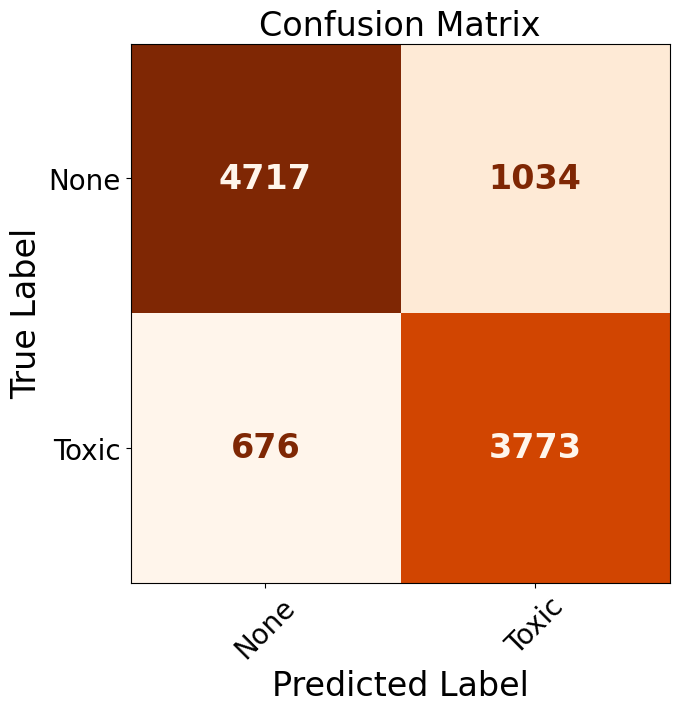

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example: assume y_true and y_pred are defined
cm = confusion_matrix(y_true, y_pred, labels=classes)

plt.figure(figsize=(25,7))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap="Oranges", values_format="d", ax=plt.gca(), colorbar=False)

# Increase number font size inside cells
for text in disp.ax_.texts:
    text.set_fontsize(24)      # increase value font size
    text.set_fontweight("bold")

# Increase text size inside the cells
plt.title("Confusion Matrix", fontsize=24)
plt.xlabel("Predicted Label", fontsize=24)
plt.ylabel("True Label", fontsize=24)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)

plt.show()


In [41]:
test_df = test_df[['id', 'label', 'model']]
test_df

,id,label,model
0,12764,Community,Bangla-Bert
1,202933,Individual,Bangla-Bert
2,165894,Individual,Bangla-Bert
3,124999,Organization,Bangla-Bert
4,535301,Society,Bangla-Bert
...,...,...,...
10195,908819,Organization,Bangla-Bert
10196,597085,Community,Bangla-Bert
10197,901448,Community,Bangla-Bert
10198,617821,Individual,Bangla-Bert


In [42]:
test_df.to_csv("finallllll_subtask_2A.tsv", sep="\t", index=False)
print("Saved to final_ensemble.tsv")

Saved to final_ensemble.tsv
